# Embedding a 2D circle with t-SNE: animations

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns
sns.set(context='paper', style='ticks')

from openTSNE import TSNE

In [2]:
# Generate the data

n = 7000
np.random.seed(42)
X = np.random.randn(n,3) / 1000
X[:,0] += np.cos(np.arange(n)*2*np.pi/n)
X[:,1] += np.sin(np.arange(n)*2*np.pi/n)

In [3]:
%%time

Zs_progress = []
def mycallback(iteration, error, embedding):
    Zs_progress.append(embedding.copy())

Zs = []
for i in range(6):
    print('.', end='')
    Z = TSNE(n_jobs=-1, initialization='random', random_state=i, negative_gradient_method='bh',
             callbacks=mycallback, callbacks_every_iters=1).fit(X)
    Zs.append(Z)
print('')

......
CPU times: user 10min, sys: 7.69 s, total: 10min 8s
Wall time: 1min 42s


<IPython.core.display.Javascript object>


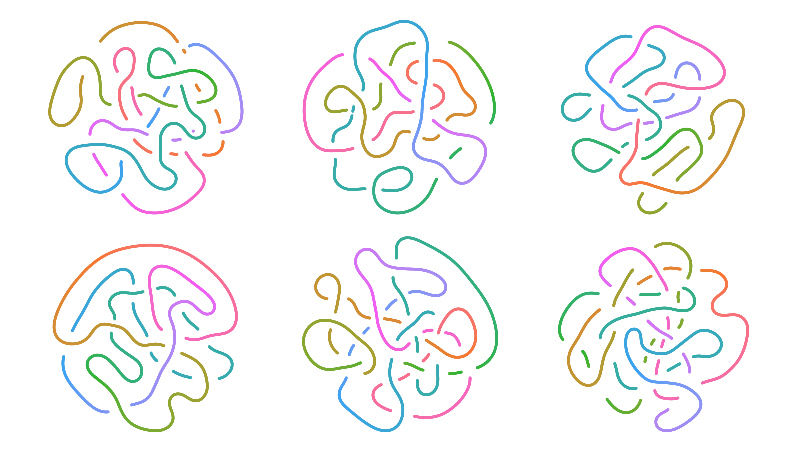

In [4]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.husl_palette(n))

plt.figure(figsize=(8,4.5))
for i,Z in enumerate(Zs,1):
    plt.subplot(2,3,i)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=3, c=np.arange(n), cmap=cmap, 
                edgecolor='none', rasterized=True)
    m = np.max(np.abs(Z)) * 1.05
    plt.xlim([-m, m])
    plt.ylim([-m, m])
    plt.xticks([])
    plt.yticks([])
    
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('knots.png', dpi=300)

<IPython.core.display.Javascript object>


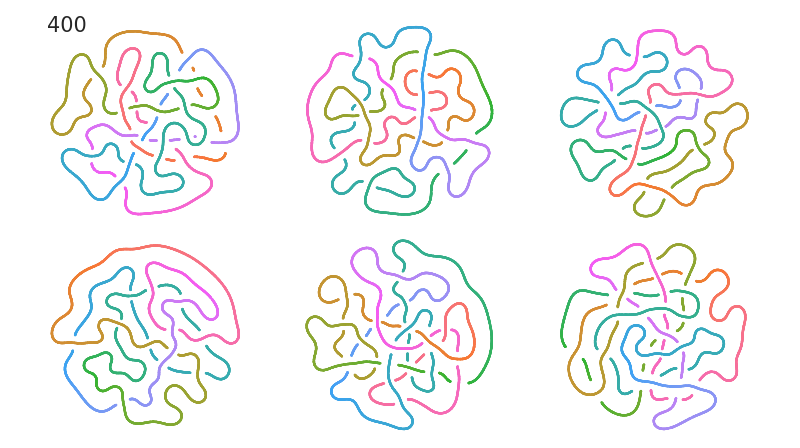

In [26]:
from matplotlib import animation

def makemymovie(Zs_progress, iters=750):
    fig = plt.figure(figsize=(8,4.5))
    scs = []
    axs = []
    for i,Z in enumerate(Zs_progress[::iters],1):
        ax = plt.subplot(2,3,i)
        plt.gca().set_aspect('equal', adjustable='box')
        sc = plt.scatter(Z[:,0], Z[:,1], s=3, c=np.arange(n), cmap=cmap, 
                         edgecolor='none', rasterized=True)        
        m = np.max(np.abs(Z)) * 1.05
        plt.xlim([-m, m])
        plt.ylim([-m, m])
        plt.xticks([])
        plt.yticks([])
        if i==1:
            tx = plt.text(0, .95, '1', transform = ax.transAxes, fontsize=15)
        axs.append(ax)
        scs.append(sc)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()

    def update_plot(frame):
        for i,Z in enumerate(Zs_progress[frame::iters]):
            scs[i].set_offsets(Z)
            m = np.max(np.abs(Z)) * 1.05
            axs[i].set_xlim([-m, m])
            axs[i].set_ylim([-m, m])
            if i==0:
                tx.set_text('{}'.format(frame+1))

    myanim = animation.FuncAnimation(fig, update_plot, frames=400, interval=100, repeat=False)
    return myanim
    
myanim = makemymovie(Zs_progress)

In [27]:
%time myanim.save('knots.gif', dpi=75, writer='imagemagick')

CPU times: user 59.8 s, sys: 180 ms, total: 60 s
Wall time: 1min 51s


In [28]:
Writer = animation.writers['ffmpeg']
%time myanim.save('knots.mp4', Writer(bitrate=1500, fps=10))

CPU times: user 53.7 s, sys: 224 ms, total: 54 s
Wall time: 54.3 s


In [23]:
%time myanim2.save('knots.gif', dpi=75, writer='imagemagick')

CPU times: user 504 ms, sys: 12 ms, total: 516 ms
Wall time: 2.41 s
